In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bioinformatics_helpers.utils import get_mendelian_dataset
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score, average_precision_score, auc

data_dir = "data/"
train_X, train_y, test_X, test_y = get_mendelian_dataset()

In [20]:
def get_moving_average(data, window_width=8):
    window_width = 8
    padded_data = np.insert(data,0,[0]*window_width)
    cumsum = np.cumsum(padded_data) 
    moving_avg_data = (cumsum[window_width:] - cumsum[:-window_width]) / window_width
    return moving_avg_data

In [6]:
def plot_AUROC_AUPRC(y_true, probas_pred, c):
    p,r,_= precision_recall_curve(y_true=y_true, probas_pred=probas_pred)
    fig, (ax,ax2) = plt.subplots(1,2,figsize=(11,6))
    ax.grid()
    
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.fill_between(r,p, alpha=0.1,color=c)
    ax.plot(r,p,color=c)
    auc_text ="AUPRC: {:.3f}".format(auc(x=r,y=p))
    ax.text(x=0.25, y=0.47, s=auc_text, fontsize=20)
    
    fpr,tpr,_ = roc_curve(y_true=y_true, y_score=probas_pred)
    ax2.set_xlabel("False positive rate")
    ax2.set_ylabel("True positive rate")
    ax2.fill_between(fpr,tpr,color=c, alpha=0.1)
    ax2.grid()
    ax2.plot(fpr,tpr, color=c)
    auc_text ="AUROC: {:.3f}".format(auc(x=fpr,y=tpr))
    ax2.text(x=0.25, y=0.47, s=auc_text, fontsize=20)
    return fig, (ax,ax2)

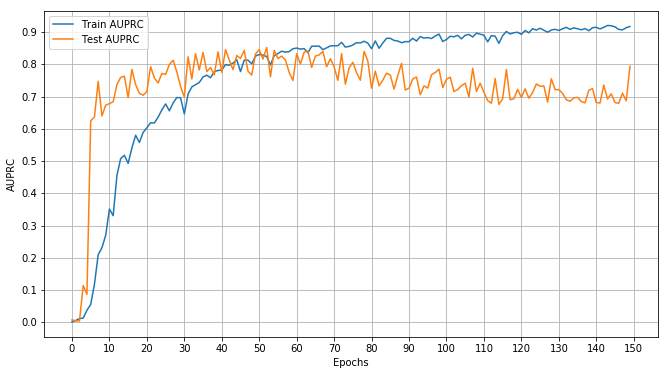

In [4]:
best_model_history = pd.read_csv(data_dir + "MLP_scaler_adam_80_history.csv")
fig, ax = plt.subplots(figsize=(11,6))
ax.grid()
ax.set_xticks(np.linspace(0,150,16))
ax.set_yticks(np.linspace(0,1,11))
ax.set_xlabel("Epochs")
ax.set_ylabel("AUPRC")
ax.plot(best_model_history["train_history"], label="Train AUPRC")
ax.plot(best_model_history["test_history"], label="Test AUPRC")
ax.legend()

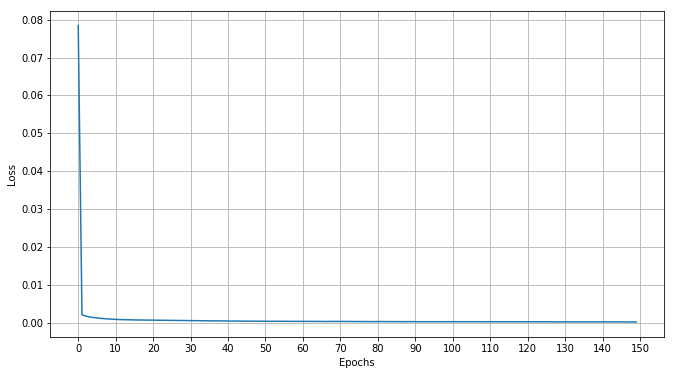

In [5]:
best_model_history = pd.read_csv(data_dir + "MLP_scaler_adam_80_history.csv")
fig, ax = plt.subplots(figsize=(11,6))
ax.grid()
ax.set_xticks(np.linspace(0,150,16))

ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.plot(best_model_history["loss"])

# Plotting AUROCs and AUPRCs

(<Figure size 792x432 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f0269cb6208>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f0269ce0668>))

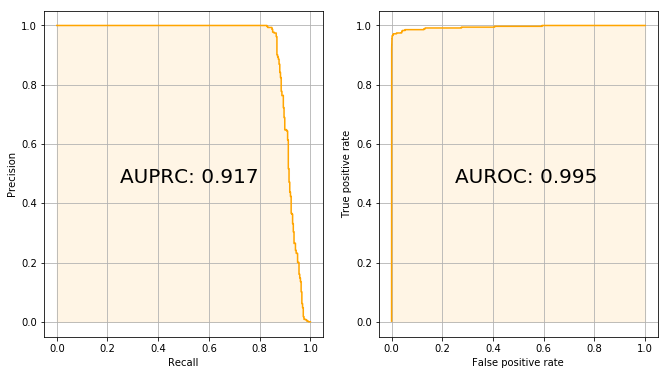

In [13]:
best_model_train_probas = pd.read_csv(data_dir + "MLP_scaler_adam_80_train_scores.csv", header=None)
plot_AUROC_AUPRC(y_true=train_y, probas_pred=best_model_train_probas, c = "orange")

(<Figure size 792x432 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f02689ca7b8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f026de76f60>))

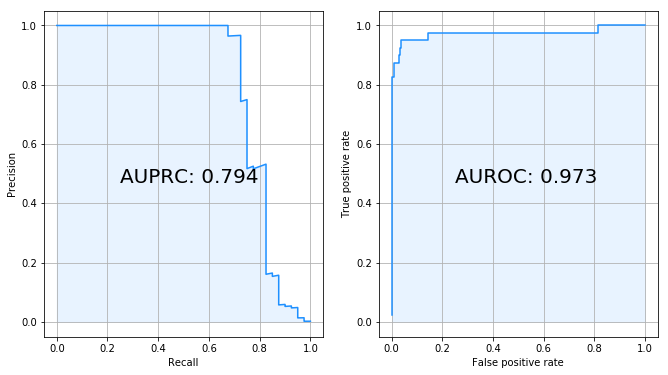

In [15]:
best_model_test_probas = pd.read_csv(data_dir + "MLP_scaler_adam_80_test_scores.csv", header=None)
plot_AUROC_AUPRC(y_true=test_y, probas_pred=best_model_test_probas, c = "dodgerblue")

(<Figure size 792x432 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f026b468e10>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f026ac3a748>))

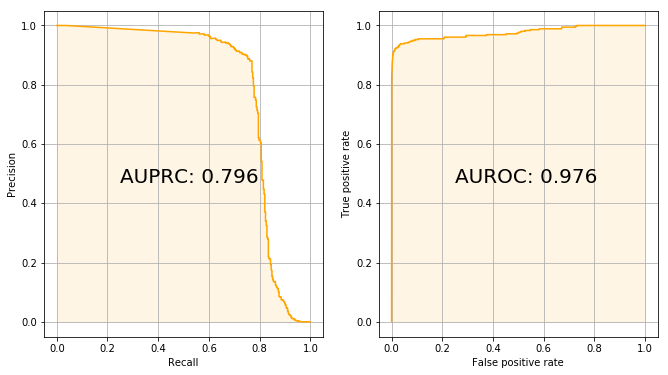

In [17]:
second_best_model_train_probas = pd.read_csv(data_dir + "MLP_scaler_adam_10-2_train_scores.csv", header=None)
plot_AUROC_AUPRC(y_true=train_y, probas_pred=second_best_model_train_probas, c ="orange")

(<Figure size 792x432 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f0269a06c50>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f02695b9e10>))

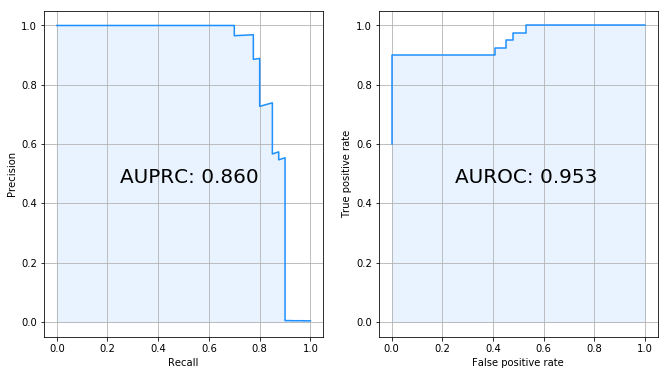

In [18]:
second_best_model_test_probas =  pd.read_csv(data_dir + "MLP_scaler_adam_10-2_test_scores.csv", header=None)
plot_AUROC_AUPRC(y_true=test_y, probas_pred=second_best_model_test_probas, c ="dodgerblue")

(<Figure size 792x432 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f026a209860>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f026b067128>))

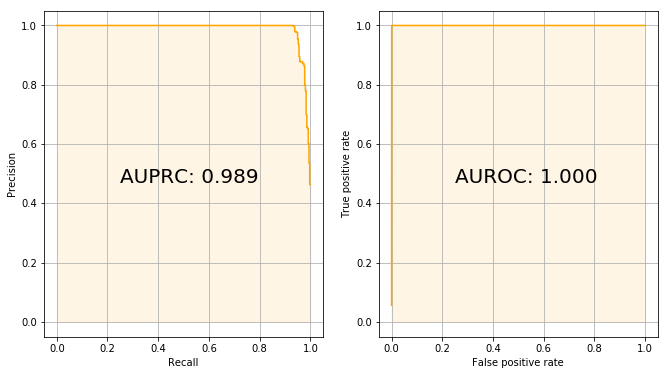

In [22]:
best_train_model_train_probas = pd.read_csv(data_dir + "MLP_scaler_adam_100-80_train_scores.csv", header=None).values
plot_AUROC_AUPRC(y_true=train_y, probas_pred=best_train_model_train_probas, c="orange")

(<Figure size 792x432 with 2 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0x7f0268dd8a58>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7f026aa573c8>))

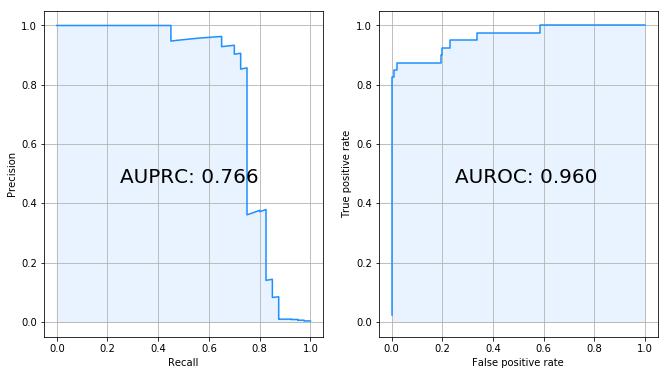

In [21]:
best_train_model_test_probas = pd.read_csv(data_dir + "MLP_scaler_adam_100-80_test_scores.csv", header=None).values

plot_AUROC_AUPRC(y_true=test_y, probas_pred=best_train_model_test_probas, c ="dodgerblue")

# Plotting comparison histories

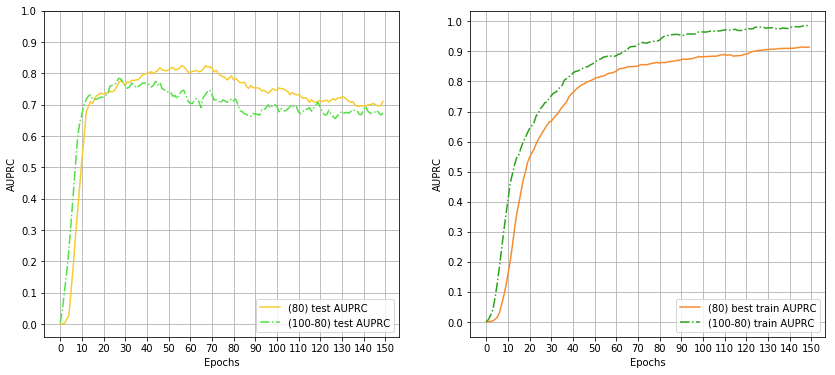

In [28]:
best_train_model_history = pd.read_csv(data_dir + "MLP_scaler_adam_100-80_history.csv")
best_model_history = pd.read_csv(data_dir + "MLP_scaler_adam_80_history.csv")
fig, (ax, ax2) = plt.subplots(1,2,figsize=(14,6))

data = get_moving_average(best_model_history["test_history"].values)
ax.plot(data, label="(80) test AUPRC", c="#f7cc31")

data = get_moving_average(best_model_history["train_history"].values)
ax2.plot(data, label="(80) best train AUPRC", c="#f78c2f")

data = get_moving_average(best_train_model_history["test_history"].values)
ax.plot(data, label="(100-80) test AUPRC", c="#53e043", linestyle="-.")

data = get_moving_average(best_train_model_history["train_history"].values)
ax2.plot(data, label="(100-80) train AUPRC", c="#29a31b", linestyle="-.")

ax.grid()
ax.set_xticks(np.linspace(0,150,16))
ax.set_yticks(np.linspace(0,1,11))
ax.set_xlabel("Epochs")
ax.set_ylabel("AUPRC")
ax.legend(loc=4)
ax2.grid()
ax2.set_xticks(np.linspace(0,150,16))
ax2.set_yticks(np.linspace(0,1,11))
ax2.set_xlabel("Epochs")
ax2.set_ylabel("AUPRC")
ax2.legend(loc=4)

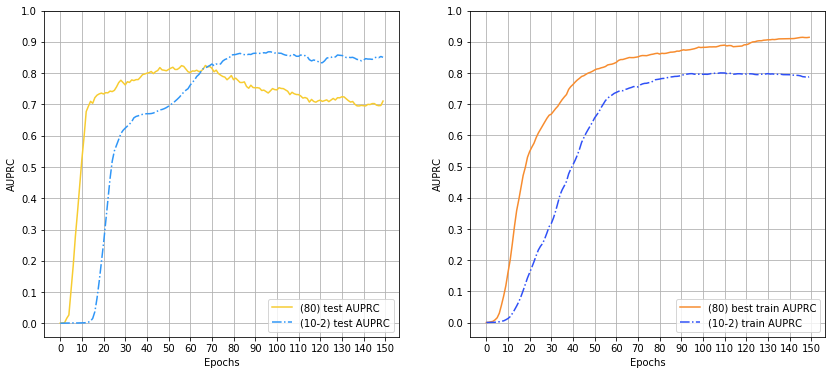

In [30]:
second_best_model_history =  pd.read_csv(data_dir + "MLP_scaler_adam_10-2_history.csv")
best_model_history = pd.read_csv(data_dir + "MLP_scaler_adam_80_history.csv")
fig, (ax, ax2) = plt.subplots(1,2,figsize=(14,6))

data = get_moving_average(best_model_history["test_history"].values)
ax.plot(data, label="(80) test AUPRC", c="#f7cc31")

data = get_moving_average(best_model_history["train_history"].values)
ax2.plot(data, label="(80) best train AUPRC", c="#f78c2f")

data = get_moving_average(second_best_model_history["test_history"].values)
ax.plot(data, label="(10-2) test AUPRC", c="#2f96f7", linestyle="-.")

data = get_moving_average(second_best_model_history["train_history"].values)
ax2.plot(data, label="(10-2) train AUPRC", c="#2f50f7", linestyle="-.")

ax.grid()
ax.set_xticks(np.linspace(0,150,16))
ax.set_yticks(np.linspace(0,1,11))
ax.set_xlabel("Epochs")
ax.set_ylabel("AUPRC")
ax.legend(loc=4)
ax2.grid()
ax2.set_xticks(np.linspace(0,150,16))
ax2.set_yticks(np.linspace(0,1,11))
ax2.set_xlabel("Epochs")
ax2.set_ylabel("AUPRC")
ax2.legend(loc=4)